In [1]:
%matplotlib inline
from pylab import *
import xarray as xr
import scipy.signal as sig
import pandas as pd

In [2]:
basedir='/vortexfs1/home/ilebras/'
datadir=basedir+'data/'
figdir=basedir+'figures/NASA_AMOC/October2022_paperfigs/'

In [3]:
date_start='2004-5-1'
date_end='2014-5-1'

In [4]:
LWmerge=xr.open_dataset(datadir+'NASA_AMOC/Section35N_Step3.nc',engine="netcdf4")
LWmerge_ext=xr.open_dataset(datadir+'NASA_AMOC/Section35N_Step3_ext.nc',engine="netcdf4")

In [5]:
ecco_LW=xr.open_dataset(datadir+'ECCO/intermediate_calcs/ecco_35MOC_LWsec.nc').sel(time=slice(date_start,date_end)).swap_dims({'k':'Z'})
ecco_W1=xr.open_dataset(datadir+'ECCO/intermediate_calcs/ecco_35MOC_W1sec.nc').sel(time=slice(date_start,date_end)).swap_dims({'k':'Z'})
ecco_W2=xr.open_dataset(datadir+'ECCO/intermediate_calcs/ecco_35MOC_W2sec.nc').sel(time=slice(date_start,date_end)).swap_dims({'k':'Z'})
ecco_E=xr.open_dataset(datadir+'ECCO/intermediate_calcs/ecco_35MOC_Esec.nc').sel(time=slice(date_start,date_end)).swap_dims({'k':'Z'})
ecco_bathy=xr.open_dataset(datadir+'ECCO/intermediate_calcs/ecco_bathy_35interp.nc')
ecco_35N=ecco_LW.trsp_z+ecco_W1.trsp_z+ecco_W2.trsp_z+ecco_E.trsp_z
ecco35_psi=ecco_35N.cumsum(dim='Z')-ecco_35N.sum(dim='Z')
ecco35_moc=ecco35_psi.max(dim='Z')

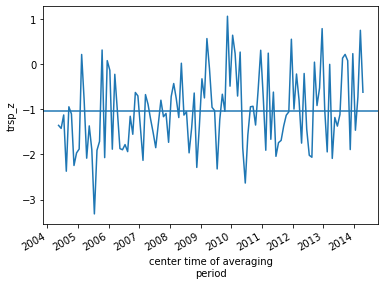

In [6]:
ecco_35N.sum(dim='Z').plot()
axhline(ecco_35N.sum(dim='Z').mean())

In [7]:
ecco_35N.sum(dim='Z').mean()

<xarray.DataArray 'trsp_z' ()>
array(-1.03388004)

In [8]:
ecco_deepflow=xr.open_dataset(datadir+'ECCO/intermediate_calcs/ecco_35MOC_deepflow.nc').sel(time=slice(date_start,date_end))['__xarray_dataarray_variable__']

In [9]:
LW_deepflow=LWmerge.trans.sel(depth=slice(1e3,6e3)).sum(dim='depth')

In [10]:
ecco_col='#225ea8'
lw_col='#ae017e'
rapid_col='#fe9929'
willis_col='#02818a'

In [11]:
print(LWmerge['MOCdepth_var'].mean().values,LWmerge['MOCdepth_var_extrap'].mean().values,LWmerge_ext['MOCdepth_var'].sel(date=slice(date_start,date_end)).mean().values,LWmerge_ext['MOCdepth_var_extrap'].sel(date=slice(date_start,date_end)).mean().values)

13.082908408255479 14.691896840112134 13.155157384692565 13.105169783640338


In [12]:
rms_unobs=sum((LWmerge.MOCdepth_var[:-1].values-ecco35_moc.values)**2)
rms_baro=sum((LWmerge.MOCdepth_var_extrap[:-1].values-ecco35_moc.values)**2)
rms_unobs_noLW=sum((LWmerge_ext.MOCdepth_var[:119].values-ecco35_moc.values)**2)
rms_baro_noLW=sum((LWmerge_ext.MOCdepth_var_extrap[:119].values-ecco35_moc.values)**2)

In [13]:
print(rms_unobs,rms_baro,rms_unobs_noLW,rms_baro_noLW)

1035.0649145720517 831.6386389339268 1136.8210000415568 800.6528253776281


<ipython-input-14-998bd156daae>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([str(yy) for yy in range(2004,2015)],rotation=0,ha='center')
<ipython-input-14-998bd156daae>:48: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  savefig(figdir+'ECCOcomp.pdf',bbox_inches='tight')
<ipython-input-14-998bd156daae>:48: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  savefig(figdir+'ECCOcomp.pdf',bbox_inches='tight')
<ipython-input-14-998bd156daae>:49: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrain

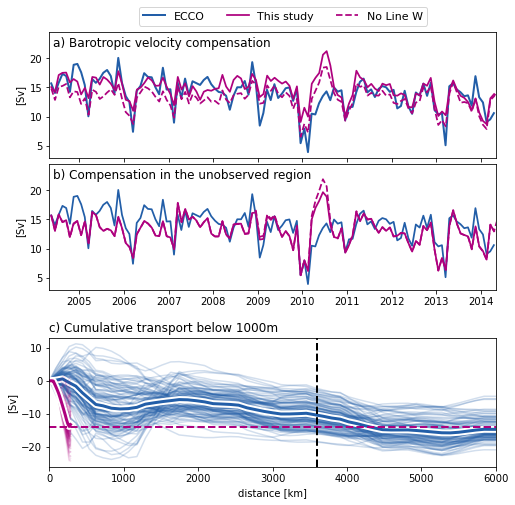

In [14]:
fig = plt.figure(constrained_layout=True,figsize=(8,8))

gs = mpl.gridspec.GridSpec(nrows=2, ncols=1, hspace=0.25, height_ratios=[2,1])
sub_gs = mpl.gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=gs[0], hspace=0.05)

ax1 = fig.add_subplot(sub_gs[0])
ax2 = fig.add_subplot(sub_gs[1], sharex=ax1)   
ax3 = fig.add_subplot(gs[1])

y1=3
y2=24.5
lwi=1.75
##############################
ecco35_moc.plot(label='ECCO',color=ecco_col,ax=ax1,lw=2)
LWmerge.MOCdepth_var_extrap.plot(label='This study',color=lw_col,ax=ax1,lw=lwi)
LWmerge_ext.MOCdepth_var_extrap.plot(label='No Line W',linestyle='--',color=lw_col,ax=ax1,lw=lwi)
ax1.set_xlim(datetime.datetime(2004,5,1),datetime.datetime(2014,5,1))
ax1.set_xlabel('')
ax1.set_ylabel('[Sv]')
ax1.set_xticklabels([])
ax1.set_ylim(y1,y2)
ax1.text(datetime.datetime(2004,6,1),22,'a) Barotropic velocity compensation',fontsize=12)
ax1.legend(loc=(0.2,1.05),ncol=4,fontsize=11)
#############################
ecco35_moc.plot(label='ECCO',color=ecco_col,ax=ax2,lw=lwi)
LWmerge.MOCdepth_var.plot(label='closure in unobserved regions',color=lw_col,ax=ax2,lw=lwi)
LWmerge_ext.MOCdepth_var.plot(label='',linestyle='--',color=lw_col,ax=ax2,lw=lwi)
ax2.set_xlim(datetime.datetime(2004,5,1),datetime.datetime(2014,5,1))
ax2.set_ylim(y1,y2)
ax2.set_xlabel('')
ax2.set_ylabel('[Sv]')
ax2.set_xticklabels([str(yy) for yy in range(2004,2015)],rotation=0,ha='center')
ax2.text(datetime.datetime(2004,6,1),22,'b) Compensation in the unobserved region',fontsize=12)

#############################
[ecco_deepflow.sel(time=tt).cumsum(dim='dist').plot(color=ecco_col,alpha=0.2,ax=ax3) for tt in ecco_deepflow.time];
ecco_deepflow.cumsum(dim='dist').mean(dim='time').plot(color='w',lw=7,ax=ax3,label='')
ecco_deepflow.cumsum(dim='dist').mean(dim='time').plot(color=ecco_col,lw=3,ax=ax3,label='ECCO')
[LW_deepflow.sel(date=dd).sel(dist=slice(0,300)).cumsum(dim='dist').plot(color=lw_col,alpha=0.1) for dd in LWmerge.date];
LW_deepflow.sel(dist=slice(0,300)).cumsum(dim='dist').mean(dim='date').plot(color='w',lw=7,ax=ax3,label='')
LW_deepflow.sel(dist=slice(0,300)).cumsum(dim='dist').mean(dim='date').plot(color=lw_col,lw=3,ax=ax3,label='Line W')
ax3.set_ylabel('[Sv]')
ax3.set_xlabel('distance [km]')
ax3.set_xlim(0,6000)
ax3.axhline(-13.9,color=lw_col,ls='--',lw=2)
ax3.axvline(3600,color='k',ls='--',lw=2)
ax3.set_title('c) Cumulative transport below 1000m',loc='left')
savefig(figdir+'ECCOcomp.pdf',bbox_inches='tight')
savefig(figdir+'ECCOcomp.png',bbox_inches='tight',dpi=300)

In [15]:
ecco_deepflow.cumsum(dim='dist').mean(dim='time').isel(dist=-1)

<xarray.DataArray '__xarray_dataarray_variable__' ()>
array(-13.75802673)
Coordinates:
    dist     float64 6.164e+03

In [16]:
ecco_deepflow.cumsum(dim='dist').mean(dim='time').interp(dist=3600)

<xarray.DataArray '__xarray_dataarray_variable__' ()>
array(-10.44602489)
Coordinates:
    dist     int64 3600

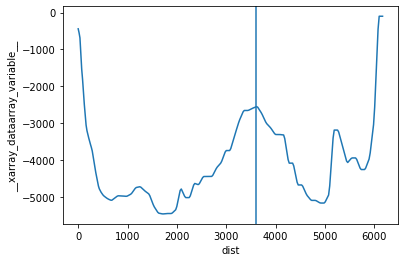

In [17]:
ecco_bathy['__xarray_dataarray_variable__'].plot()
axvline(3600,)

In [18]:
corrcoef(ecco35_moc.values,LWmerge.MOCdepth_var[:-1])[0,1]

0.4546848133886248

In [19]:
corrcoef(ecco35_moc.values,LWmerge.MOCdepth_var_extrap[:-1])[0,1]

0.519882401813639

In [20]:
corrcoef(ecco35_moc.values,LWmerge_ext.MOCdepth_var[:119])[0,1]

0.41783891702057885

In [21]:
corrcoef(ecco35_moc.values,LWmerge_ext.MOCdepth_var_extrap[:119])[0,1]

0.5387547243874576

In [22]:
LW_deepflow.sel(dist=slice(0,300)).cumsum(dim='dist').mean(dim='date').min()

<xarray.DataArray 'trans' ()>
array(-13.87421004)

In [65]:
p_LW_deep=np.polyfit(LWmerge.time.values, LW_deepflow.sel(dist=slice(0,300)).sum(dim='dist'), 1)

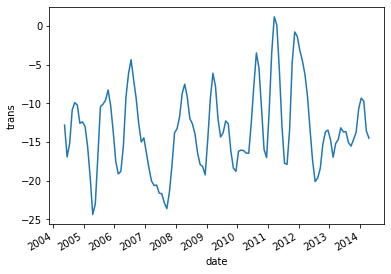

In [66]:
LW_deepflow.sel(dist=slice(0,300)).sum(dim='dist').plot()

In [67]:
p_LW_deep[0]

0.2977696123238053

In [76]:
conf_int_LWdeep=(LW_deepflow.sel(dist=slice(0,300)).sum(dim='dist').std(dim='date')*tstar/LWmerge.time.std(dim='date')/sqrt(neff-2)).values

In [77]:
conf_int_LWdeep

array(0.59539369)

In [78]:
ecco_deepwest=ecco_deepflow.sel(dist=slice(0,300)).sum(dim='dist')

In [83]:
p_ecco_deepwest=np.polyfit(LWmerge.time.values[:-1], ecco_deepwest, 1)
p_ecco_deepmid=np.polyfit(LWmerge.time.values[:-1], ecco_deepflow.sel(dist=slice(300,3600)).sum(dim='dist'), 1)
p_ecco_deepeast=np.polyfit(LWmerge.time.values[:-1], ecco_deepflow.sel(dist=slice(3600,5000)).sum(dim='dist'), 1)

In [84]:
print(p_ecco_deepwest[0],p_ecco_deepmid[0],p_ecco_deepeast[0])

0.14231604022514915 0.13701563275696008 0.16400984897985543


In [87]:
conf_int_ecco_deepwest=(ecco_deepwest.std(dim='time')*tstar/LWmerge.time.std(dim='date')/sqrt(neff-2)).values

In [88]:
conf_int_ecco_deepwest

array(0.48863288)

In [ ]:
ecco_deepflow.sel(dist=slice(0,300)).sum(dim='dist')

In [23]:
rapid=xr.open_dataset(datadir+'RAPID/moc_transports.nc')
rapid_psi_ds=xr.open_dataset(datadir+'RAPID/moc_vertical.nc')

In [24]:
dat=pd.read_csv(datadir+'Willis/2020_update/moc_trans.txt',sep='\s+')
time=dat.iloc[:,0]
moc=dat.iloc[:,1]
date=[datetime.datetime(int(dd),1,1)+datetime.timedelta(days=(dd-int(dd))*365.25) for dd in time]
Willis=xr.DataArray(moc,dims={'date':date})
Willis['date']=date
# Willis=Willis.sel(date=slice('2004-5-1','2014-5-1'))

In [25]:
rapid_moc=rapid.moc_mar_hc10.resample(time='1M',loffset='2W',label='left').mean().rolling(time=3).mean()
rapid_psi=rapid_psi_ds.stream_function_mar.sel(time=slice(date_start,date_end))

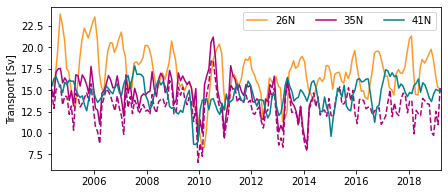

In [26]:
figure(figsize=(7,3))
lwz=1.5
rapid_moc.plot(label='26N',lw=lwz,color=rapid_col)
LWmerge.MOCdepth_var_extrap.plot(label='35N',lw=lwz,color=lw_col)
LWmerge_ext.MOCdepth_var_extrap.plot(label='',lw=lwz,color=lw_col,ls='--')
Willis.plot(label='41N',lw=lwz,color=willis_col)
ylabel('Transport [Sv]')
xlim(datetime.datetime(2004,5,1),datetime.datetime(2019,4,1))
# grid('on')
legend(ncol=3)
xlabel('')
xticks(rotation=0,ha='center')
# ylim(8,27)
savefig(figdir+'AMOCcomp_rapidWillis.pdf',bbox_inches='tight')
savefig(figdir+'AMOCcomp_rapidWillis.png',bbox_inches='tight',dpi=300)

In [27]:
p_rapid = np.polyfit(LWmerge.time.values[1:], rapid_moc.interp(time=LWmerge.date)[1:], 1)
p_willis=np.polyfit(LWmerge.time.values, Willis.interp(date=LWmerge.date), 1)

In [28]:
tstar=2.021 # 95% confidence for 40 effective degrees of freedom

In [29]:
neff=40

In [30]:
conf_int_rapid=(rapid_moc.interp(time=LWmerge.date).std(dim='date')*tstar/LWmerge.time.std(dim='date')/sqrt(neff-2)).values
conf_int_willis=(Willis.interp(date=LWmerge.date).std(dim='date')*tstar/LWmerge.time.std(dim='date')/sqrt(neff-2)).values

In [31]:
print(p_rapid[0],conf_int_rapid)

-0.4360427853508289 0.3412015411236206


In [32]:
print(p_willis[0],conf_int_willis)

-0.1639600842732238 0.17768911907968157


In [33]:
p_rapid_ext = np.polyfit(LWmerge_ext.time.values[1:], rapid_moc.interp(time=LWmerge_ext.date)[1:], 1)
p_willis_ext =np.polyfit(LWmerge_ext.time.values[:-1], Willis.interp(date=LWmerge_ext.date)[:-1], 1)

In [69]:
neff_ext=15*4

In [70]:
conf_int_rapid_ext=(rapid_moc.interp(time=LWmerge_ext.date).std(dim='date')*tstar/LWmerge_ext.time.std(dim='date')/sqrt(neff_ext-2)).values
conf_int_willis_ext=(Willis.interp(date=LWmerge_ext.date).std(dim='date')*tstar/LWmerge_ext.time.std(dim='date')/sqrt(neff_ext-2)).values

In [71]:
print(p_rapid_ext[0],conf_int_rapid_ext)

-0.11998764995783062 0.1627355435676205


In [72]:
print(p_willis_ext[0],conf_int_willis_ext)

-0.0006331962398164651 0.09739463860780223


In [37]:
p_ecco = np.polyfit(LWmerge.time.values[:-1], ecco35_moc, 1)

In [38]:
conf_int_ecco=(ecco35_moc.interp(time=LWmerge.date).std(dim='date')*tstar/LWmerge.time.std(dim='date')/sqrt(neff-2)).values

In [39]:
print(p_ecco[0],conf_int_ecco)

-0.39507848058382317 0.31547110023220415


In [40]:
LWmoc=LWmerge.MOCdepth_var
LWmoc_ext=LWmerge_ext.MOCdepth_var

In [41]:
import statsmodels.api as sm

#calculate cross correlation
rap_lw_corr=sm.tsa.stattools.ccf(rapid_moc.sel(time=slice(date_start,'2014-5-1'))[1:],LWmoc[1:])
rap_nolw_corr=sm.tsa.stattools.ccf(rapid_moc.sel(time=slice(date_start,'2014-5-1'))[1:],LWmoc_ext.sel(date=slice(date_start,'2014-5-1'))[1:])
rap_lw_corr_ext=sm.tsa.stattools.ccf(rapid_moc.sel(time=slice(date_start,'2019-5-1'))[1:],LWmoc_ext)

In [47]:
rap_lw_corr[:10]

array([ 0.14796154,  0.36179617,  0.51591269,  0.43836974,  0.33886515,
        0.17099396,  0.04719868, -0.03712989, -0.1119729 , -0.14882195])

In [42]:
lw_ek=LWmerge.Ekman_wdepth.sum(dim=['depth','dist'])
rapid_ek=rapid.t_ek10.resample(time='1M',loffset='2W',label='left').mean().rolling(time=3).mean()

In [43]:
rap_lw_ek_corr=sm.tsa.stattools.ccf(rapid_ek[2:120],lw_ek[2:120])

In [48]:
rap_lw_noEK_corr=sm.tsa.stattools.ccf(rapid_moc[2:120]-rapid_ek[2:120],LWmoc[2:120]-lw_ek[2:120])